Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

<b>Задача — провести анализ и подготовить план действий по удержанию клиентов.</b>

<u>А именно:</u> 
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

   1. выделить целевые группы клиентов;<br>
   2. предложить меры по снижению оттока;<br>
   3. определить другие особенности взаимодействия с клиентами.

### Шаг 1. Загрузим данные

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

In [2]:
# сохраним данные в таблицу
data = pd.read_csv('/datasets/gym_churn.csv')
pd.set_option('display.float_format', '{:,.2f}'.format)
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


In [3]:
# напишем функцию для получения информации о датафрейме

#'\n\033[7;30m таблица: gym \033[0m\n'


def df_info (data):
    print('\n \033[7;36m Первые 5 строк \033[0m')
    display(data.head(5))
    print('\n \033[7;36m Последние 5 строк \033[0m')
    display(data.tail(5))
    print('\n \033[7;36m Типы данных \033[0m \n')
    display(data.info())
    print('\n \033[7;36m Статистическая сводка \033[0m')
    display(data.describe().T)
    print('\n \033[7;36m Пропуски \033[0m')
    display(data.isna().sum())
    print('\n \033[7;36m Процент пропусков от всего датасета \033[0m')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\n \033[7;36m Дубликаты \033[0m')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
# проверим на ошибки датасет data
df_info(data)


  Первые 5 строк 


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0



  Последние 5 строк 


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.41,12.00,8,2.28,2.35,0
3996,0,1,0,0,1,1,1,29,68.88,1.00,1,1.28,0.29,1
3997,1,1,1,1,1,12,0,28,78.25,11.00,2,2.79,2.83,0
3998,0,1,1,1,1,6,0,32,61.91,5.00,3,1.63,1.60,0
3999,1,0,1,0,0,12,1,30,178.86,12.00,1,1.10,1.04,0



  Типы данных  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          400

None


  Статистическая сводка 


,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
Near_Location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
Partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
Promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
Phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
Contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
Group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
Age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
Avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
Month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00



  Пропуски 


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


  Процент пропусков от всего датасета 


gender                              0.00
Near_Location                       0.00
Partner                             0.00
Promo_friends                       0.00
Phone                               0.00
Contract_period                     0.00
Group_visits                        0.00
Age                                 0.00
Avg_additional_charges_total        0.00
Month_to_end_contract               0.00
Lifetime                            0.00
Avg_class_frequency_total           0.00
Avg_class_frequency_current_month   0.00
Churn                               0.00
dtype: float64


  Дубликаты 
Дубликатов НЕТ


Как видим, дубликатов и пропусков нет, типы данных корректные. Приведём названия столбцов к общепринятому формату:

In [5]:
data.columns = data.columns.str.lower() 
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


Поменяем значения столбца 'month_to_end_contract' на тип 'int', т.к. абонементы длятся кратно месяцу.

In [6]:
# меняем тип данных в стлбце месяца
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int')

# и посмотрим на средние значения и стандартные отклонения
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00


Скачали и сохранили датасет, проверили корректность данных. Пропусков и дубликатов нет, исправлено написание названий столбцов - приедено к общепринятой форме. Данные распределены достаточно равномерно, стандартные отклонения близки к средним показателям.

Датасет содержит 4000 записей.

### Проведём исследовательский анализ данных (EDA)

#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [7]:
data.groupby('churn').mean().T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Из получившейся таблицы видим, что никак не влияют на отток клиентов следующие показатели:
- пол (0.51 в обоих случаях)
- указанный номер телефона (0.90 в обоих случаях)

Очень сильно влияют:
- длительность текущего действующего абонемента (5.75 против 1.73 - чтобы остаться)
- срок до окончания текущего действующего абонемента (5.28 и 1.66 соотвественно)
- время с момента первого обращения в фитнес-центр (4.71 против 0.99)

По всем остальным показателям тоже наблюдается снижение, но не такое резкое.

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [8]:
# создадим список для неизменяемых признаков
attributes_list = ['gender', 'phone', 'near_location', 'partner', 'promo_friends', 'group_visits', 'contract_period']

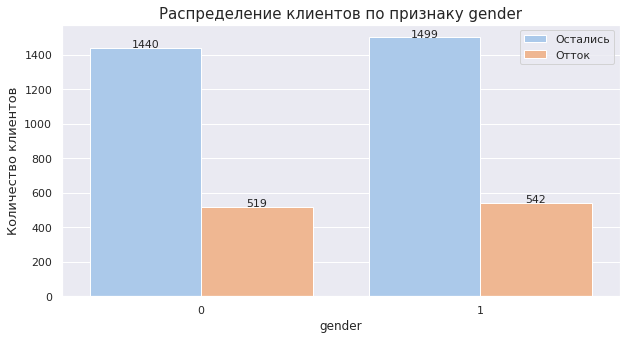


 доля ушедших 


,gender,total,churn,share
0,0,1959,519,0.26
1,1,2041,542,0.27


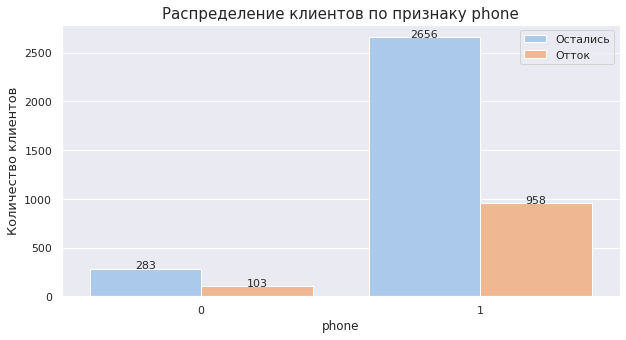


 доля ушедших 


,phone,total,churn,share
0,0,386,103,0.27
1,1,3614,958,0.27


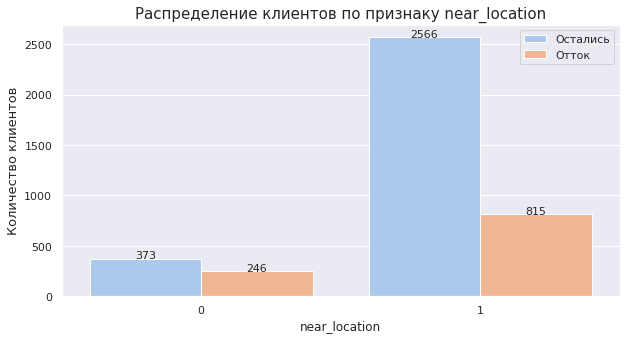


 доля ушедших 


,near_location,total,churn,share
0,0,619,246,0.40
1,1,3381,815,0.24


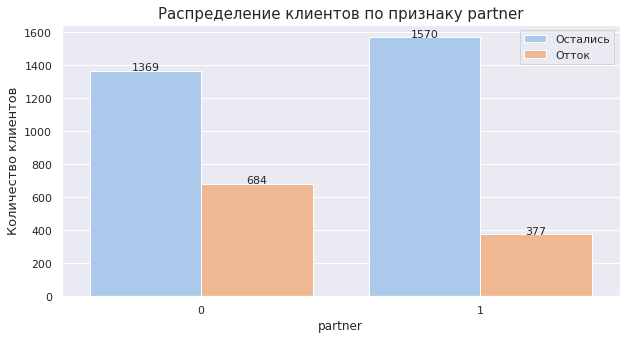


 доля ушедших 


,partner,total,churn,share
0,0,2053,684,0.33
1,1,1947,377,0.19


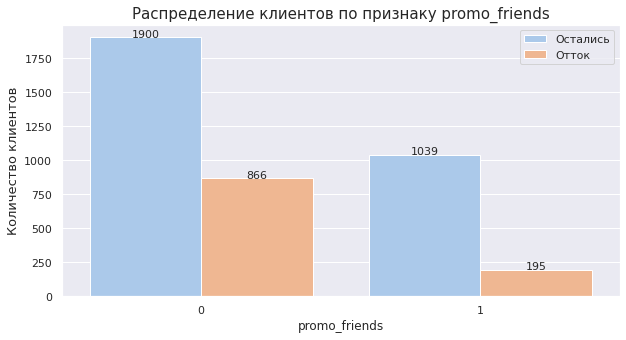


 доля ушедших 


,promo_friends,total,churn,share
0,0,2766,866,0.31
1,1,1234,195,0.16


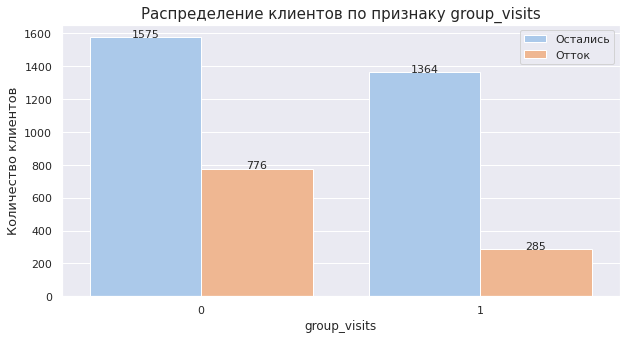


 доля ушедших 


,group_visits,total,churn,share
0,0,2351,776,0.33
1,1,1649,285,0.17


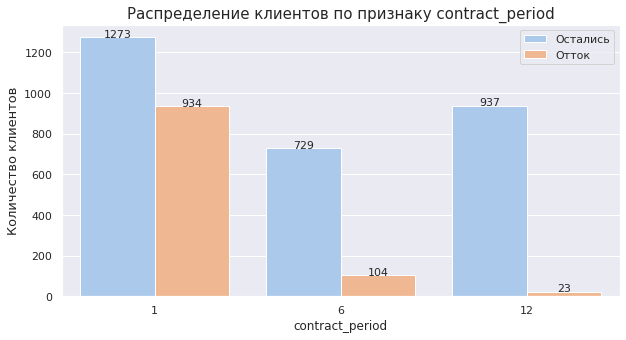


 доля ушедших 


,contract_period,total,churn,share
0,1,2207,934,0.42
1,6,833,104,0.12
2,12,960,23,0.02


In [9]:
for feature in attributes_list:
    countplt, ax = plt.subplots(figsize = (10,5))
    ax =sns.countplot(x = feature, data=data, palette='pastel', hue='churn')
    ax.set_title(f'Распределение клиентов по признаку {feature}',fontsize = 15)
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Количество клиентов', fontsize = 13)
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,
                 rect.get_height()+ 0.25,
                 rect.get_height(),
                 horizontalalignment='center', 
                 fontsize = 11)
    plt.legend(['Остались', 'Отток'])
    plt.show()
    print('')
    share = data.groupby(feature).agg({'churn': ['count', 'sum']}).reset_index()
    share.columns = [feature, 'total', 'churn']
    share['share'] = round(share['churn'] / share['total'], 2)
    print('\033[7;36m доля ушедших \033[0m')
    display(share)


- видим, что графики подтверждают вывод о том, что пол и наличие контатных данных не влияют на выбор клиента об уходе 
- близкое расположение имеет значение: клуб покинули 40% тех, кто живёт не поблизости, и лишь 24% - кто поблизости
- наличие корпоративной карты (partner) также имеет значение: без неё ушли 33%, с ней - лишь 19%
- промокод также является более надёжным средством для того, чтобы клиент остался: без промокода ушло 31%, с промокодом - 16%, почти вдвое больше
- групповые занятия - ещё один хороший способ сохранить клиентов и тоже практически вдвое больше ушедших без таких занятий: 33% против 17%
- наличие длительного абонемента (6 либо 12 месяцев) - почти полная гаратния того, что клиент останется

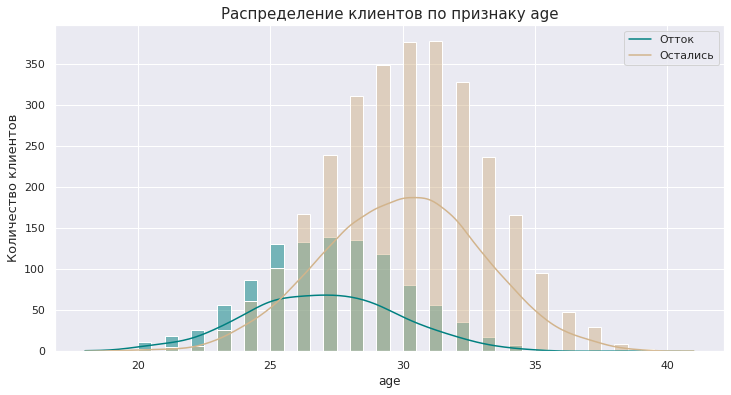

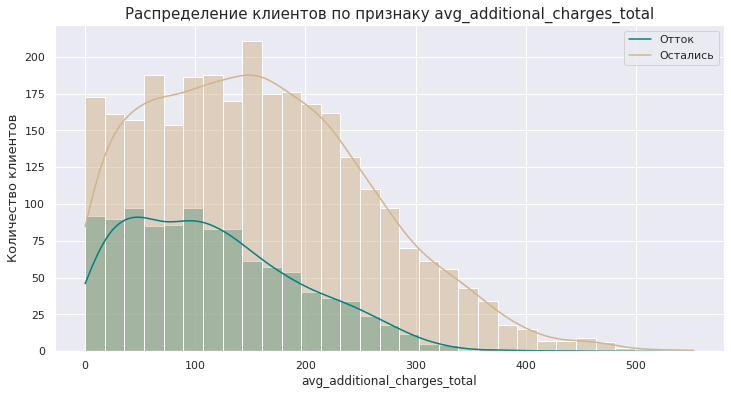

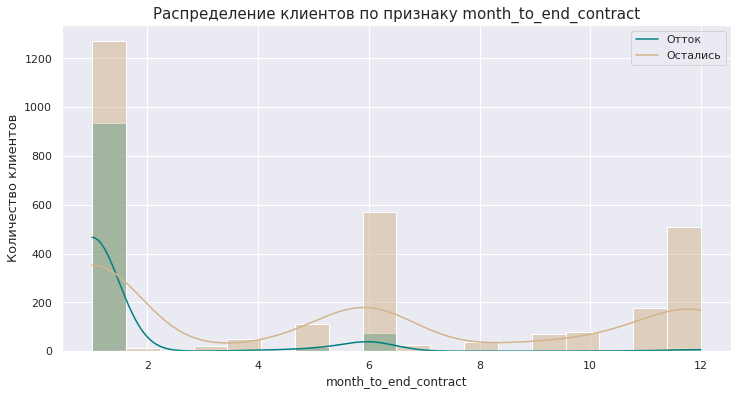

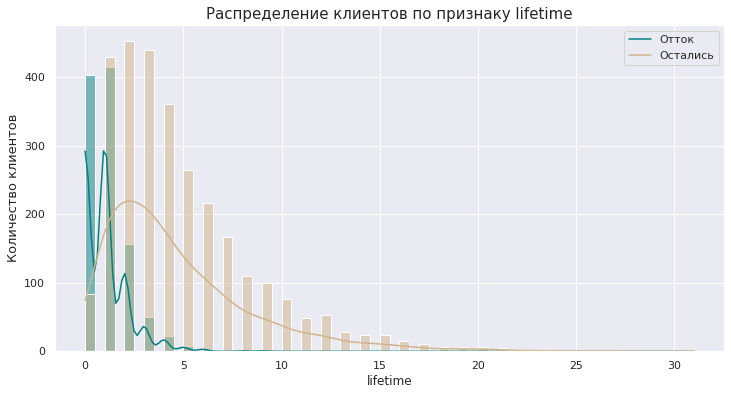

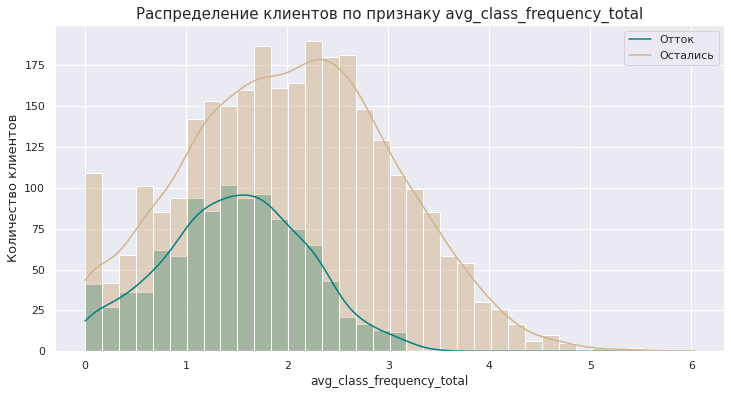

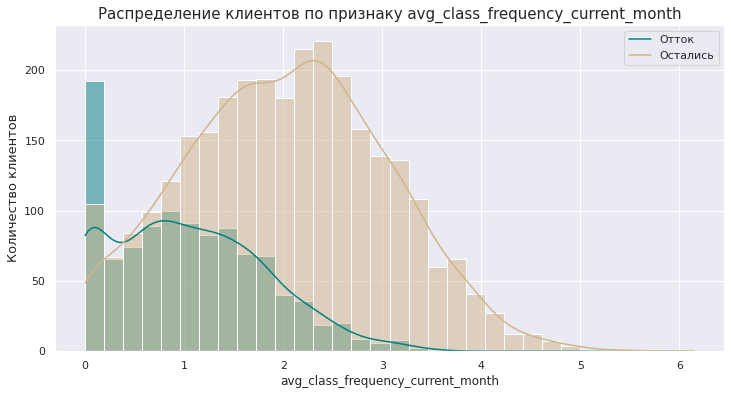

In [10]:
# посмотрим распределение остальных признаков
for column in data.drop('churn', axis = 1).columns:
    if column not in attributes_list:
        hist, ax = plt.subplots(figsize = (12,6))
        ax = sns.histplot(x = column, data=data, palette=['tan', 'teal'], hue='churn', kde=True)
        ax.set_title(f'Распределение клиентов по признаку {column}',fontsize = 15)
        ax.set_xlabel(f'{column}')
        ax.set_ylabel('Количество клиентов', fontsize = 13)
        plt.legend(['Отток', 'Остались'])
        plt.show()

Видим, что наибольший отток у следующих групп/признаков:
- возраст до 27 лет
- мало пользующихся (мало тратящих) доп услугами
- меньше месяца до окончания действия абонемента
- клиенты, посещающие клуб первые 2 месяца 
- клиенты, у которых за предыдущий месяц было не более 1 посещения и которые занимаются в клубе 1-2 раза в неделю

#### Построим матрицу корреляций

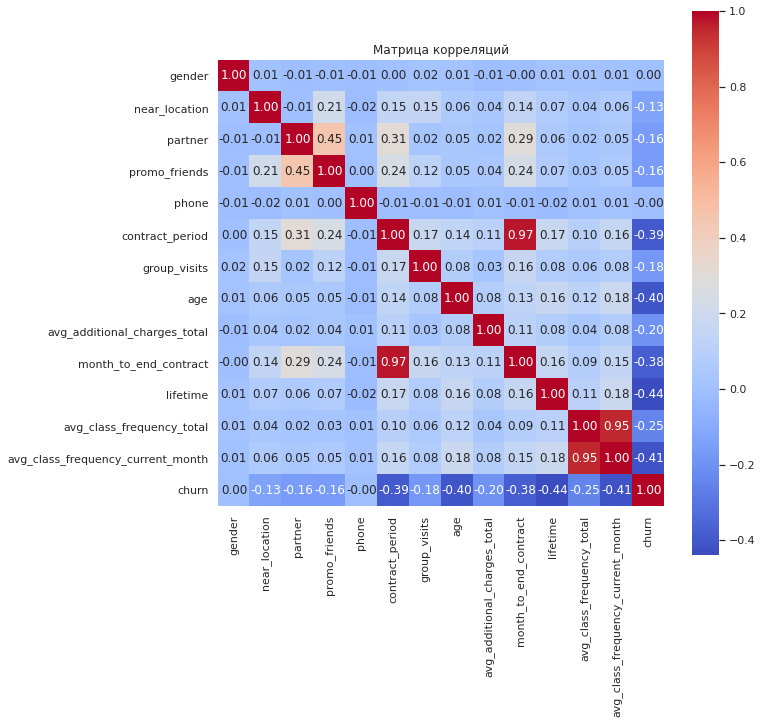

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, square=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

По получившейся матрице видим, что большинство признаков никак не влияют друг на друга за исключиением двух пар переменных: 
- contract_period (длительность текущего абонемента) и month_to_end_contract (срок до окончания абонемента) - 0,97
- аvg_class_frequency_total (средняя частота посещений в неделю) и аvg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц) - 0,95
Признаки с высокой корреляцией вызывают переобучаемость модели, поэтому рекомендуется удалить один из коррелирующих признаков, в нашем случае удалим столбцы month_to_end_contract (срок до окончания абонемента) и аvg_class_frequency_total (средняя частота посещений в неделю).

Все признаки и целевая переменная churn имеют слабую или умеренную корреляцию, при этом она обратная, а значит, при усилении признака, снижается отток клиентов. Средняя коррелиция у признаков age (возраст клиента) = -0.40 и lifetime (время с момента первого обращения в фитнес-центр) = -0.44. Умеренную среднюю корреляцию показывают признаки partner (сотрудник компании-партнёра) и promo_friends (первое посещение по промокоду) = - 0,16 оба признака.



In [12]:
# удалим коррелирующие признаки
data.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1, inplace=True)
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,3,0.00,0
1,0,1,0,0,1,12,1,31,113.20,7,1.91,0
2,0,1,1,0,1,1,0,28,129.45,2,1.74,0
3,0,1,1,1,1,12,1,33,62.67,2,3.36,0
4,1,1,1,1,1,1,0,26,198.36,3,1.12,0


Отдельно отметим, что группы ушедших и оставшихся клиентов несбалансированны - 73% оставшихся против 27% ушедших.

<b><u>Выводы:</u></b>

- пол и наличие контатных данных не влияют на выбор клиента об уходе
- близкое расположение имеет значение: клуб покинули 40% тех, кто живёт не поблизости, и лишь 24% - кто поблизости
- наличие корпоративной карты (partner) также имеет значение: без неё ушли 33%, с ней - лишь 19%
- промокод также является более надёжным средством для того, чтобы клиент остался: без промокода ушло 31%, с промокодом - 16%, почти вдвое больше
- групповые занятия - ещё один хороший способ сохранить клиентов и тоже практически вдвое больше ушедших без таких занятий: 33% против 17%
- наличие длительного абонемента (6 либо 12 месяцев) - почти полная гаратния того, что клиент останется

Видим, что наибольший отток у следующих групп/признаков:
- возраст до 27 лет
- мало пользующихся (мало тратящих) доп услугами
- меньше месяца до окончания действия абонемента
- клиенты, посещающие клуб первые 2 месяца 
- клиенты, у которых за предыдущий месяц было не более 1 посещения и которые занимаются в клубе 1-2 раза в неделю

Также отметим, что:
- связь целевой переменной (churn) с остальными признаками отрицательная, что говорит о том, что при усилении признака снижается отток клиентов, но признаков сильно связанных с оттоком клиентов не выявлено (максимум -0,44)
- обнаружены две пары мультиколлинеарных признаков: длительность текущего абонемента / срок до окончания абонемента и средняя частота посещений в неделю / средняя частота посещений в неделю за предыдущий месяц. Удалили по одному признаку из каждой пары, чтобы избежать переобучаемость модели
- несбалансированность классов целевой переменной

### Шаг 3. Построим модель прогнозирования оттока клиентов

Используем модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. ООбучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом. Сравним, какая из моделей показывает себя лучше.

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели и посмотрим, какая модель показала себя лучше на основании метрик.

In [13]:
# разделим наши данные на признаки (Х) и целевую переменную (y)
X = data.drop('churn', axis=1)
y = data['churn']

# поделим данные на обучающую и валидационную выборки (соотношение 80/20),
# т.к. у нас присутствует дисбаланс классов, добавим параметр stratify, который выполняет разделение таким образом, 
#что доля значений в полученной выборке будет такой же, как доля значений, предоставленных этому параметру (т.е. 80/20):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [14]:
# приведём признаки к стандартному виду с помощью стандартизации (StandardScaler())
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритмы для моделей
lr_model = LogisticRegression(random_state=0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# обучим модели
lr_model.fit(X_train_st, y_train)
rf_model.fit(X_train, y_train) 

# прогнозы
lr_predictions = lr_model.predict(X_test_st)
rf_predictions = rf_model.predict(X_test) 

Напишим функцию для вывода метрик:

In [15]:
# функция для вывода метрик
def metrics(y_true, y_pred, model):
    print(f'Метрики модели {model}')
    print('Accuracy: {:.2%}'.format(accuracy_score(y_true, y_pred)))
    print('Precision: {:.2%}'.format(precision_score(y_true, y_pred)))
    print('Recall: {:.2%}'.format(recall_score(y_true, y_pred)))

Метрика логистической регрессии

In [16]:
metrics(y_test, lr_predictions, 'LogisticRegression')

Метрики модели LogisticRegression
Accuracy: 91.75%
Precision: 84.76%
Recall: 83.96%


Метрика случайного леса

In [17]:
metrics(y_test, rf_predictions, 'RandomForestClassifier')

Метрики модели RandomForestClassifier
Accuracy: 90.25%
Precision: 84.54%
Recall: 77.36%


По полученным данным видим, что модель логистической регресси проявила себя несколько лучше, ее значения ближе к единице. Поэтому, главной метрикой будем считать Recall, т.к. она показывает, сколько реальных объектов 1 класса модель смогла обнаружить, а также она нацелена на минимизацию рисков <i>не</i> определить какой клиент потенциально в следующем месяце окажется в оттоке. Далее, для определения оттока клиентов будем использовать модель логистической регрессии и, помимо остальных метрик, оценивать показатель метрики Recall.

Посмотрим какие признаки для каждой из моделей наиболее важные.

In [18]:
data_lr = pd.DataFrame({'feature': X.columns, 'coeff': lr_model.coef_[0]})
data_lr['coeff_abs'] = data_lr['coeff'].abs()
display(data_lr[['feature', 'coeff_abs']].sort_values(by='coeff_abs', ascending=False).head(5))

,feature,coeff_abs
9,lifetime,3.65
5,contract_period,1.41
10,avg_class_frequency_current_month,1.29
7,age,1.17
8,avg_additional_charges_total,0.57


In [19]:
data_rf = pd.DataFrame({'feature': X.columns, 'coeff': rf_model.feature_importances_})
display(data_rf.sort_values(by='coeff', ascending=False).head(5))

,feature,coeff
9,lifetime,0.32
10,avg_class_frequency_current_month,0.22
7,age,0.14
8,avg_additional_charges_total,0.12
5,contract_period,0.11


Для обеих моделей в топ-5 видимо одинаковый набор признаков:
- время с момента первого обращения, 
- длительность абонемента, 
- частота посещений, 
- возраст 
- выручка от доп.услуг

Отметим, что признак "возраст" оказался на 3 и 4 месте по значимости в двух таблицах, что вполне логично - как было видно на предыдущих графиках, более возрастные пользователи менее подвержены оттоку, что вполне логично - у них появляется больше свободного времени.

<b><u>Выводы:</u></b>

Было проведено разделение данных на обучающую и валидационную выборки, проведена стандартизация признаков, мы обучили модели и построили прогнозы. Чуть лучшие результаты метрик показал алгоритм логистической регрессии:

- Accuracy показывает, что было определено правильно 91.75% прогнозов
- Precision говорит, что среди целевого класса (1) доля правильных ответов составила 84.54%
- Recall показывает, что 83.96% реальных объектов 1 класса смогли обнаружить с помощью модели

Также определили наиболее важные признаки для модели (топ-5):

- время с момента первого обращения в фитнес-центр (в месяцах)
- длительность текущего действующего абонемента (в месяцах)
- средняя частота посещений в неделю
- возраст
- суммарная выручка от дополнительных услуг

### Шаг 4. Сделаем кластеризацию клиентов

#### Стандартизируем данные

In [20]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:3]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121, -0.19332863,
        -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  0.87368001,
         0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.46008079,
        -0.02901851]])

#### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму

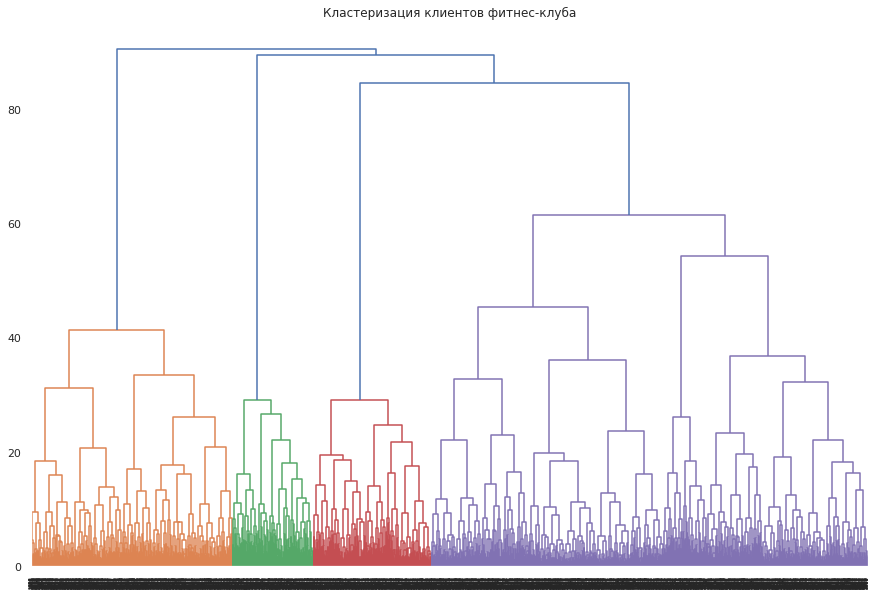

In [21]:
linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов фитнес-клуба')
plt.show() 

Судя по графику, алгоритм предлагает разделить всех клиентов на 4 кластера. Однако, фиолетовая часть значительно превышает остальные, поэтому, считаю, что её можно разделить ещё на 2 кластера. 

#### Обучим модель кластеризации на основании алгоритма K-Means

In [22]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters=5, random_state=0) 
labels = km.fit_predict(X_sc)

Посмотрим на значение метрики силуэта

In [23]:
silhouette_score(X_sc, labels)

0.13904733417201764

Видим, что показатель метрики силуэта равен 0,139, что говорит о том, что расстояние между кластерами практически несущественно. Однако, кластеризация, предложенная алгоритмом, тоже далека от идеала - чуть больше 0.15, а как мы знаем, данная метрика принимает значения от -1 до 1, где -1 говорит нам о том что кластеры назначены неправильным образом, а 1 означает, что кластеры находятся на значительном расстоянии друг от друга и четко различимы и чем ближе значение метрики к единице, тем лучше.

#### Посмотрим на средние значения признаков для кластеров

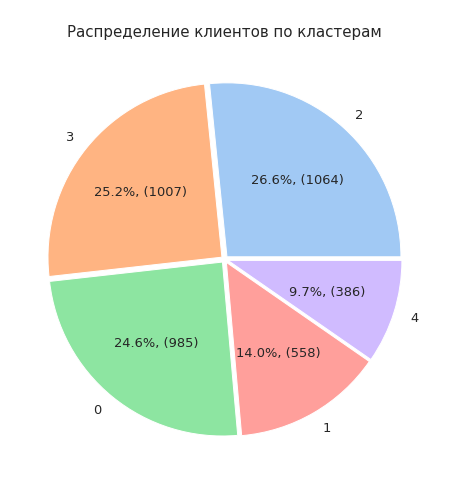

In [24]:
data['clasters'] = labels
value = data['clasters'].value_counts()
(data['clasters']
 .value_counts()
 .plot(kind='pie', 
       figsize=(8,8), 
       autopct=lambda p:f'{p:.1f}%, ({p*sum(value)/100 :.0f})',
       explode=(0.02, 0.02, 0.02, 0.02, 0.02),
       textprops = {"fontsize":13},
       colors=sns.color_palette('pastel'))
)
plt.title('\nРаспределение клиентов по кластерам', fontsize = 15)
plt.ylabel('')
plt.show()

На круговой диаграмме видим, что самые крупными являются кластеры 0, 2 и 3 с примерно равными долями: 24,6%, 26,66% и 25,2% соответственно. Гораздо меньше кластер 1 - 14%, а кластер 4 является самым маленьким с долей в 9,7%.

#### Далее рассчитаем средние значения признаков и долю оттока клиентов по кластерам

In [30]:
mean_value = data.groupby('clasters').mean().T
mean_value.style.highlight_min(color="#d1e2f2", axis=1).highlight_max(color="#99bfe2", axis=1)

clasters,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415


In [28]:
share = data.groupby('clasters').agg({'churn': ['count', 'sum']}).reset_index()
share.columns = ['claster', 'total', 'churn']
share['share'] = round(share['churn'] / share['total'], 2)
print('\n \033[7;36m доля оттока по кластерам \033[0m')
display(share[['claster', 'share']])


  доля оттока по кластерам 


,claster,share
0,0,0.12
1,1,0.40
2,2,0.56
3,3,0.01
4,4,0.27


<b><u>Кластер 0</u></b> - третий по численности (985 человек). 
<br>Практически равное разделение полов, можно сказать, что все живут рядом, почти у всех есть корпоративная карта, все пришли по промо-коду, все оставили контактную информацию. Этосамые преданные пользователи сервиса - отток у них очень небольшой (0,12), а абонемент - самый продолжительный - почти 7 месяцев. Более половины из них посещают групповые занятия, они в среднем старше 29 лет, охотно пользуются дополнительными платными сервисами, это опытные пользователи - в среднем они занимаются уже более 4 месяцев и посещают зал 2 раза в неделю.

<b><u>Кластер 1</u></b> - те, кто живут далеко. Второй по численности с конца (558 человек).
<br>Разделение полов ровно попалам, чуть меньше половины с корпоративынми картами, но, в отличие от кластера 0 - мало кто с пришёл по промо-коду. Все оставили свои контактные данные. Одни из самых коротких абонеменотов - 3 месяца и одни из самых уходящих - доля оттока 40%. Средний возраст здесь ниже - 28 с половиной лет, меньше всех ходят на групповые занятия (0.23) и почти меньше всех ходят в зал вообще - чуть больше, чем полтора раза в неделю.

<b><u>Кластер 2</u></b> - те, кому зал, по сути, не нужен - самый высокий % оттока - более 56%.
<br>Как ни странно, все живут рядом, разделение по полам - поровну. Менее чем у четверти есть корпоративные карты, почти никто не воспользовался промо-кодом, абонемент редко берут более, чем на 1 месяц. Групповые занятия посещают чуть более 27%, средний возраст чуть более 27, тратят на доп услуги меньше всех, в среднем занимаются не более 2 месяцев и очень мало кто - более 1 раза в неделю. Это самая большая группа (1064 человека) - группа новичков, которые пришли в ближайший фитнесс попробовать, что это такое.

<b><u>Кластер 3</u></b> - преданные друзья - самый низкий отток - 0,015
<br>Вторая по численности группа (1007 человек). Почти все живут рядом, можно сказать, что не пользуются промо-кодами, более трети (0,38) имеют корпоративную карту, все оставили свои данные, предпочитают брать абонементы от 6 месяцев. Эта группа - лидер сразу по нескольким показателям: групповые занятия, средний возраст (более 30,5 лет), сумма дополнительных услуг, продолжительность пользования сервсом, количество посещений в неделю. Можно смело сказать, что эти люди точно знают, зачем они туда ходят. Но в этой группе преобладает 1 из полов = 0.534

<b><u>Кластер 4</u></b> - те, кто не оставил контактных данных. 
<br>Самая маленькая группа (386 человек). Не все живут рядом с залом, почти у половины есть корпоративная карта (0,47). Эту группу ещё можно назвать "группой 3-го места" - по нескольким признакам идут на 3 месте: корпоративная карта, длительность абонемента (4,77), групповые занятия (0,42), возраст (чуть старше 29), лайфтайм (3,9), количество потраченных денег на доп услуги (144), количество занятий в  неделю (1,72). Ну, и как следствие - 3 место с конца по оттоку - 0.26. В этой группе тоже преобладает 1 зи полов - 0.523

#### Построим распределения для признаков по кластерам

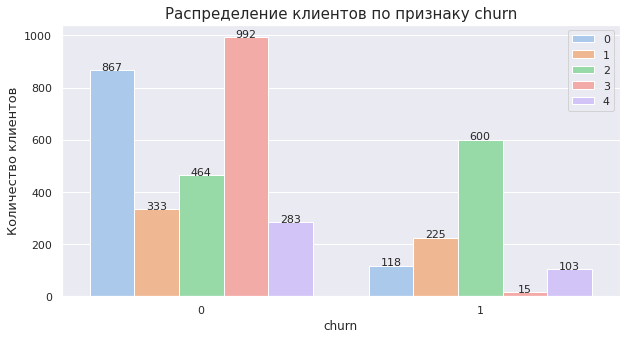

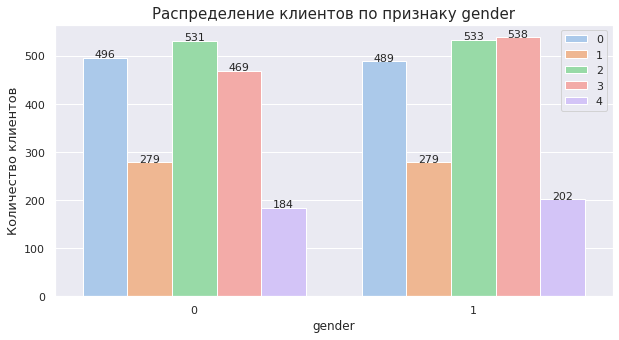

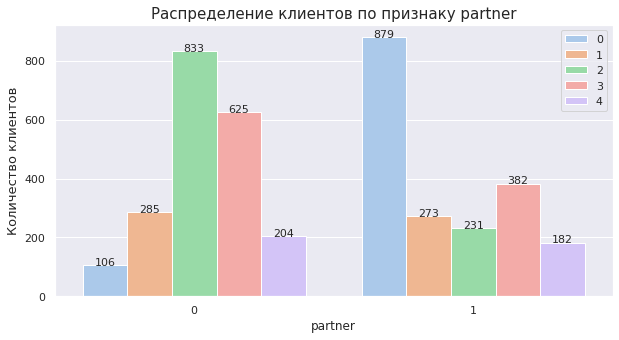

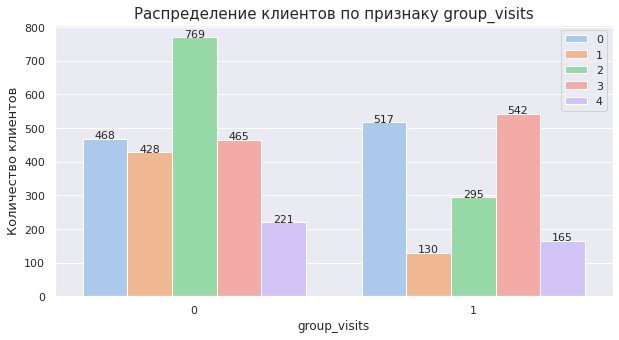

In [31]:
for column in ['churn', 'gender', 'partner', 'group_visits']:
    countplt, ax = plt.subplots(figsize = (10,5))
    ax =sns.countplot(x = column, data=data, palette='pastel', hue='clasters')
    ax.set_title(f'Распределение клиентов по признаку {column}',fontsize = 15)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Количество клиентов', fontsize = 13)
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,
                 rect.get_height()+ 0.25,
                 rect.get_height(),
                 horizontalalignment='center', 
                 fontsize = 11)
    plt.legend(loc='best')
    plt.show()
    print('')

Видим, что графики подтверждают наши выводы:

- наибольший отток наблюдается в группе 2, наименьший - в группах 3 и 0
- по половому признаку наблюдается стабильное равенство
- больше всего по партнерской программе пришло клиентов 0-го кластера
- чаще всего ходят на групповые занятия клиенты кластера 3 и 0, реже всего - кластера 2

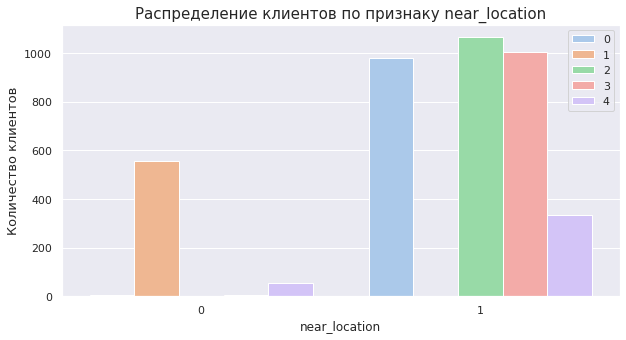

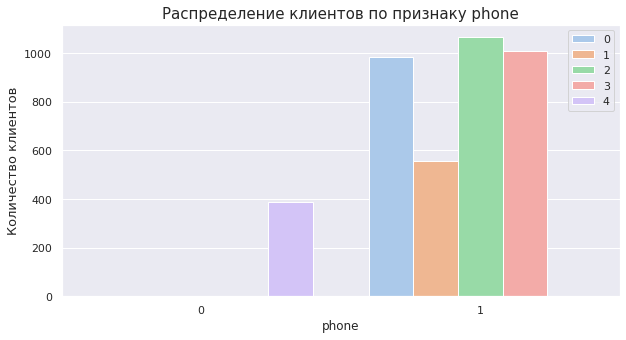

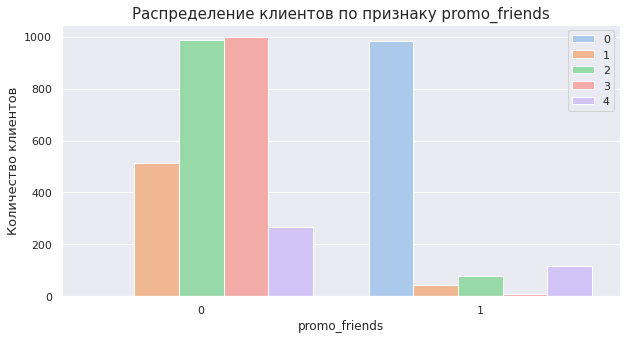

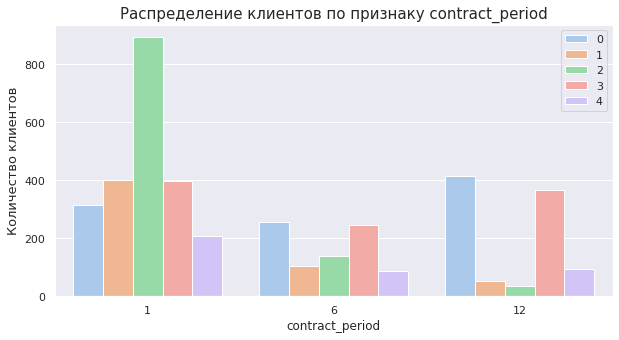

In [32]:
for column in ['near_location', 'phone', 'promo_friends', 'contract_period']:
    countplt, ax = plt.subplots(figsize = (10,5))
    ax =sns.countplot(x = column, data=data, palette='pastel', hue='clasters')
    ax.set_title(f'Распределение клиентов по признаку {column}',fontsize = 15)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Количество клиентов', fontsize = 13)
    plt.legend(loc='upper right')
    plt.show()
    print('')

- единственный кластер, где клиенты живут либо работают далеко от фитнес-центра - кластер 1
- единственный кластер, где отсутствует контактная информация клиентов - кластер 4
- единственный кластер, где все клиенты записались по промо-коду - 0
- кластер 2 в 2 раза и чаще по сравнению с другими выбирает абонементы на месяц. У кластера 0 из чуть больше, чем на 6 месяцев с преобладанием годовых абонементов. Чуть менее часто годовые абонементы выбирают клиенты кластера 3 

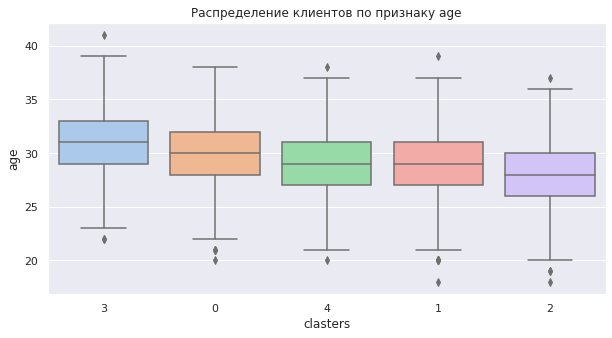

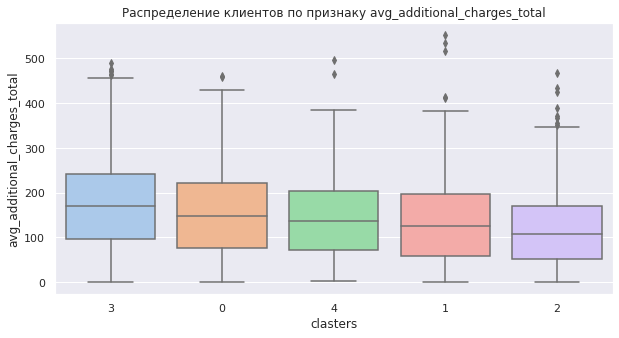

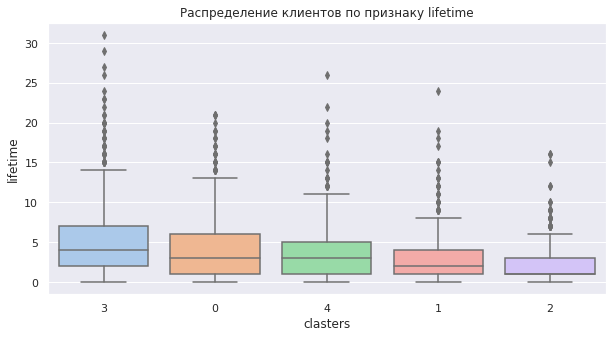

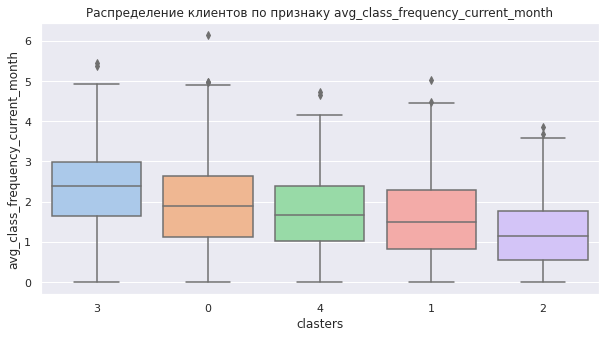

In [36]:
for column in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']:
    mean_by_column = data.groupby(['clasters'])[column].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.boxplot(x='clasters', y=column, data=data, palette='pastel', order=mean_by_column.index)
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

Из полученных графиков видим одинаковую тенденцию - одинаково нисходящие показатели, начиная от кластера 3, заканчивая кластером 2. При этом кластер 3 очень сильно выделяется по сравнению с группой середняков, не очень сильно отстающих друг от друга - кластеорв 0, 4 и 1. Кластер 4 - это как раз те, кто не оставил контактных данных, т.е. люди, которые не до конца понимают, нужен им зал или нет. Кастер 2 с худшими показателями - это новички, которые пришли попробовать. А лидирует кластер 3 - опытные пользователи, чётко понимающие зачем они ходят в зал. 

<b><u>Выводы:</u></b>

Стандартизировали данные и построили дендограмму, на основании которой разделили нашу выборку на 5 кластеров применили алгоритм K-Means, посмотрели на средние значения признаков по получившимся кластерам и долю оттока клиентов, изучили распределение признаков в каждом кластере. Среди полученных 5 кластеров можно найти некоторые схожие между ними признаки и, для формирования портрета типичного клиента можно выделить 3 группы:

<b>1. надежные клиенты (кластер 3 и 0)</b>:
- проживают или работают поблизости
- посещают групповые занятия
- выбирают более длительные абонементы
- охотно пользуются дополнительными платными услугами
- средний возраст от 29 до 32 лет
- посещают зал более 4 месяцев не менее 2 раз в неделю
- самый низкий показатель оттока: 0,01 и 0,12

<b>2. новички (кластер 2)</b>:
- проживают или работают поблизости
- групповые занятия посещают редко
- выбирают более короткие абонементы
- мало пользуются дополнительными платными услугами
- средний возраст чуть более 27 лет
- посещают зал менее 2 месяцев крайне редко чаще, чем 1 раз в неделю
- имеют самый высокий показатель оттока: более 0.56

<b>3. малочисленные группы (кластер 4 и 1)</b> - отличаются промежуточными значениями по средним показателям:
- посещаемость групповых занятий
- продолжительность абонементов (3-5 месяцев)
- сумма дополнительных платных услугх (137-144)
- средний возраст (28-29 с небольшим)
- посещают зал 3-4 месяца 1-2 раза в неделю
- единственная существенная разница между кластреми: весь кластер 1 живёт или работает далеко от зала, а кластер 4 - лишь небольшая часть
- показатели оттока 0.266 для кластера 4 и 0.403 для кластера 1





### Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами

<b>Была проведена предобработка данных</b>: 

датасет был проверен на корректность данных. Пропусков и дубликатов нет, исправлено написание названий столбцов - приедено к общепринятой форме. Данные распределены достаточно равномерно, стандартные отклонения близки к средним показателям.

Датасет содержит 4000 записей.

Далее было определено, что:
- пол и наличие контатных данных не влияют на выбор клиента об уходе
- близкое расположение имеет значение: клуб покинули 40% тех, кто живёт не поблизости, и лишь 24% - кто поблизости
- наличие корпоративной карты (partner) также имеет значение: без неё ушли 33%, с ней - лишь 19%
- промокод также является более надёжным средством для того, чтобы клиент остался: без промокода ушло 31%, с промокодом - 16%, почти вдвое больше
- групповые занятия - ещё один хороший способ сохранить клиентов и тоже практически вдвое больше ушедших без таких занятий: 33% против 17%
- наличие длительного абонемента (6 либо 12 месяцев) - почти полная гаратния того, что клиент останется

<b>Получили, что наибольший отток у следующих групп/признаков</b>:
- возраст до 27 лет
- мало пользующихся (мало тратящих) доп услугами
- меньше месяца до окончания действия абонемента
- клиенты, посещающие клуб первые 2 месяца 
- клиенты, у которых за предыдущий месяц было не более 1 посещения и которые занимаются в клубе 1-2 раза в неделю

<b>Кластеризация показала следующие результаты</b>:

Стандартизировали данные и построили дендограмму, на основании которой разделили нашу выборку на 5 кластеров применили алгоритм K-Means, посмотрели на средние значения признаков по получившимся кластерам и долю оттока клиентов, изучили распределение признаков в каждом кластере. Среди полученных 5 кластеров можно найти некоторые схожие между ними признаки и, для формирования портрета типичного клиента можно выделить 3 группы:

<b>1. надежные клиенты (кластер 3 и 0)</b>:
- проживают или работают поблизости
- посещают групповые занятия
- выбирают более длительные абонементы
- охотно пользуются дополнительными платными услугами
- средний возраст от 29 до 32 лет
- посещают зал более 4 месяцев не менее 2 раз в неделю
- самый низкий показатель оттока: 0,01 и 0,12

<b>2. новички (кластер 2)</b>:
- проживают или работают поблизости
- групповые занятия посещают редко
- выбирают более короткие абонементы
- мало пользуются дополнительными платными услугами
- средний возраст чуть более 27 лет
- посещают зал менее 2 месяцев крайне редко чаще, чем 1 раз в неделю
- имеют самый высокий показатель оттока: более 0.56

<b>3. малочисленные группы (кластер 4 и 1)</b> - отличаются промежуточными значениями по средним показателям:
- посещаемость групповых занятий
- продолжительность абонементов (3-5 месяцев)
- сумма дополнительных платных услугх (137-144)
- средний возраст (28-29 с небольшим)
- посещают зал 3-4 месяца 1-2 раза в неделю
- единственная существенная разница между кластреми: весь кластер 1 живёт или работает далеко от зала, а кластер 4 - лишь небольшая часть
- показатели оттока 0.266 для кластера 4 и 0.403 для кластера 1

<b>Рекомендации</b>:
1. для группы №1 - надёжные клиенты:
- отслеживать основные показатели: частота посещений в неделю, посещение групповых занятий (предлагать другие, если наметились прогулы), продление абонементов и пользование доп услугами. Если показатели будут снижаться, в индивидуальном порядке предлагать скидки и акции.

2. для группы №2 - новички:
- выявить интересы и предложить наиболее подходящие для каждого клиента групповые занятия, 
- предложить уловия как и в акции "приведи друга"
- рассказать о наличии дополнительных услуг (платных) в фитнес-центре

3. для группы №3 - малочисленные группы со средними показателями:
- провести с отделом маркетинга работу над предложениями, которые улучшат средние показатели этой группы, например, при покупке абонемента на более длительный период, доп услуга в подарок.